# Gradient Descent Applied To Linear Regression

#### Sources:

http://ufldl.stanford.edu/tutorial/supervised/LinearRegression/
https://www.youtube.com/watch?v=YS_EztqZCD8
https://introml.mit.edu/notes/gradient_descent.html
https://www.ibm.com/think/topics/gradient-descent

#### Introduction

Gradient descent is a method used to train a variety of machine learning algorithms. In this notebook, we will use a few common gradient descent varients to perform linear regression, and explore how gradient descent works. Although linear regression has a closed form solution (I go through that here [MultipleLinear+PolynomialRegression](https://github.com/JakeLarimer/MLAlgosFromScratch/blob/main/MultipleLinearRegression%2BPolynomialRegression.ipynb)), other algorithms often do not, requiring gradient descent to learn. Given the simplicity of linear regression compared to other algorithms, it acts as a good vessel to demonstrate the application of gradient descent.

The ovarching goal of gradient descent is to identify model parameters that lead to a local minima of a "cost" or "loss" function. These functions essentially defines the error between the predicted values from a model, and the actual values. Loss and cost functions are similar, but have an important distinction. Loss refers to the sum of the function over all predicted and true values, while cost is the average error per value. Different algorithms use different loss functions. For example with linear regression, we use the $\textit{sum of squared errors}$ or $\textit{SSE}$:

$$
\sum_{i=1}^n(y_i-\hat{y}_i)^2
$$

where $y_i$ is a true observation and $\hat{y}_i$ is the corresponing predicted value.

Loss functions are generally denoted as $J(\Theta)$ where $\Theta$ is a vector containing the model parameters. Thus, our goal is to find $\Theta^*$ such that $\Theta^*=\arg \min_{\Theta}J(\Theta)$. With gradient descent, we will traverse $J(\Theta)$ by adjusting $\Theta$ until a minima is found. The distance at each iteration which we move around the loss function is defined as the $\textit{learning rate}$ denoted $\eta$. A small $\eta$ will often identify minima with more accuracy, but can be computationally expensive. A large $\eta$ is faster, but is more likely to miss a minima.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['text.usetex'] = False

Text(0, 0.5, 'Loss $J(\\Theta)$')

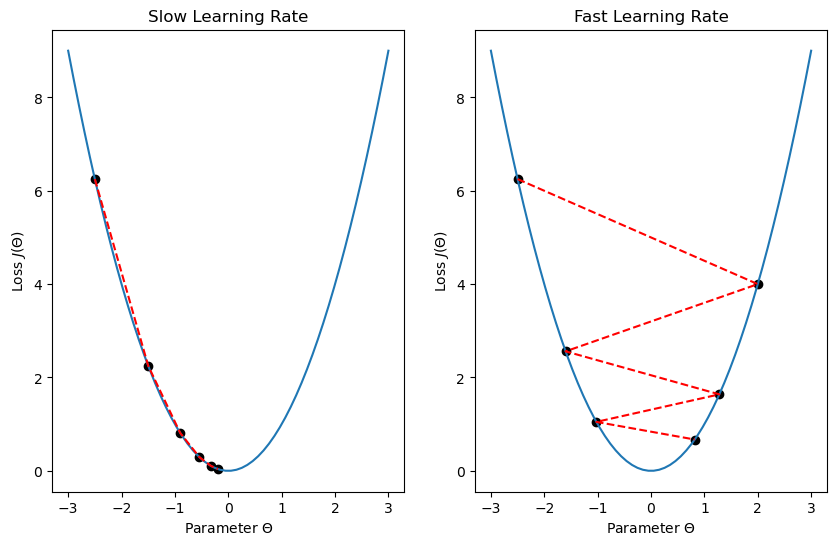

In [8]:
xcurve = np.linspace(-3,3,60)
ycurve = xcurve ** 2

xstart = -2.5
xpoints = [[xstart], [xstart]]
ypoints = [[], []]

etascale = [0.2, 0.9]

iterations = 6

for j in range(2):
    
    for i in range(iterations):

        if i != iterations - 1:
        
            xpoints[j].append(xpoints[j][i] - etascale[j]*2*xpoints[j][i])
                
        ypoints[j].append(xpoints[j][i] ** 2)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))

ax1.plot(xcurve, ycurve)
ax1.plot(xpoints[0], ypoints[0], color='red', linestyle='--')
ax1.scatter(xpoints[0], ypoints[0], color='black')
ax1.set_title("Slow Learning Rate")
ax1.set_xlabel(r"Parameter $\Theta$")
ax1.set_ylabel(r"Loss $J(\Theta)$")

ax2.plot(xcurve, ycurve)
ax2.plot(xpoints[1], ypoints[1], color='red', linestyle='--')
ax2.scatter(xpoints[1], ypoints[1], color='black')
ax2.set_title("Fast Learning Rate")
ax2.set_xlabel(r"Parameter $\Theta$")
ax2.set_ylabel(r"Loss $J(\Theta)$")


The algorithm will decide how to adjust the parameters $\Theta$ by computing the gradient of the loss function:
$$
\nabla_{\Theta} J(\Theta)=
\begin{bmatrix}
\large\frac{\partial J}{\partial \theta_1} \\
\vdots \\
\large\frac{\partial J}{\partial \theta_m} \\
\end{bmatrix}
$$

and adjusting the parameters depending on the negative gradient and learning rate:

$$
\Theta^{(t)} = \Theta^{(t-1)} - \eta \nabla_{\Theta} J(\Theta^{(t-1)})
$$

So let's try applying this to a one dimentional linear regression. Recall:

$$
J(\Theta) = \sum_{i=1}^n(y_i-\hat{y}_i)^2 = \sum_{i=1}^n(y_i-(\theta_0+\theta_1 x_i))^2
$$

So,

$$
\frac{\partial J}{\partial \theta_0} = \frac{\partial}{\partial \theta_0}\sum_{i=1}^n(y_i-(\theta_0+\theta_1 x_i))^2=-2\sum_{i=1}^n(y_i-(\theta_0+\theta_1 x_i))
$$

And,

$$
\frac{\partial J}{\partial \theta_1} = \frac{\partial}{\partial \theta_1}\sum_{i=1}^n(y_i-(\theta_0+\theta_1 x_i))^2=-2\sum_{i=1}^n(x_i)(y_i-(\theta_0+\theta_1 x_i))
$$

Thus,

$$
\nabla_{\Theta} J(\Theta)=
\begin{bmatrix}
-2\sum_{i=1}^n(y_i-(\theta_0+\theta_1 x_i)) \\
-2\sum_{i=1}^n(x_i)(y_i-(\theta_0+\theta_1 x_i)) \\
\end{bmatrix}
$$

So for some $\Theta^{(t)}$:

$$
\Theta^{(t)} = \Theta^{(t-1)} - \eta \begin{bmatrix}
-2\sum_{i=1}^n(y_i-(\theta_0+\theta_1 x_i)) \\
-2\sum_{i=1}^n(x_i)(y_i-(\theta_0+\theta_1 x_i)) \\
\end{bmatrix}
$$|

Now we can actually apply this after a few more clarifications. First, the learning rate $\eta$ can be defined and scaled in a variety of ways. In this example, we are just going to use a constant $\eta$. Second, we have to tell the algorithm when to stop searching for a minima, as often in practice we do not find the actual minima where 

$$
\nabla_{\Theta} J(\Theta)=
\begin{bmatrix}
0 \\
\vdots \\
0 \\
\end{bmatrix}
$$

In the above example comparing learning rates, we limit the iterations of $\Theta$ to six, inclusive of the starting point. This time, we'll stop when $\nabla J(\Theta)$ gets within some close range to a minima. We are going to define a somewhat arbitray starting place for theta of

$$
\Theta 
=\begin{bmatrix}
\theta_0 \\
\theta_1 \\
\end{bmatrix}
=\begin{bmatrix}
0 \\
0 \\
\end{bmatrix}
$$

and end when

$$
|\nabla_{\Theta} J(\Theta)| \leq 
\begin{bmatrix}
\epsilon_0 \\
\epsilon_1 \\
\end{bmatrix}
$$

Text(0, 0.5, 'y')

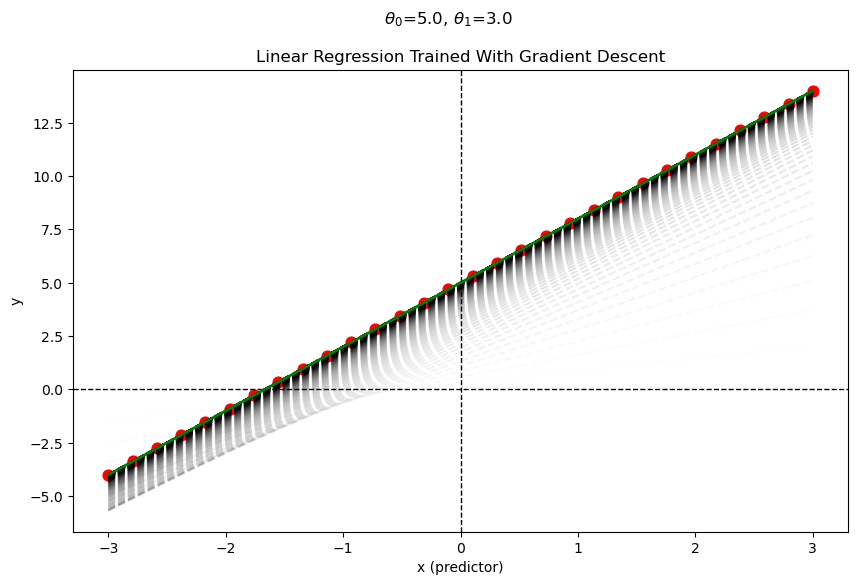

In [9]:
x = np.linspace(-3,3,30)
y = 3 * x + 5
ypred_list = []

etascale = 0.001
epsilon = [0.1, 0.1]

theta = np.array([0, 0])

num_iters = 0

# Function to compute the gradient
def find_gradJ(x, y, theta):
    j0 = 0.
    j1 = 0.
    
    for i in range(len(x)):
        j0 += y[i] - (theta[0] + theta[1] * x[i])
        j1 += x[i] * (y[i] - (theta[0] + theta[1] * x[i]))

    j0 *= -2
    j1 *= -2

    return np.array([j0, j1])

# Initializing gradient
gradJ = find_gradJ(x, y, theta)


while abs(gradJ[0]) > epsilon[0] or abs(gradJ[1]) > epsilon[1]:
    
    theta = theta - etascale * gradJ
    
    gradJ = find_gradJ(x, y, theta)
    
    ypred = theta[0] + x * theta[1]
    ypred_list.append(ypred)

    num_iters += 1


plt.figure(figsize=(10,6))
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axvline(0, color='black', linestyle='--', linewidth=1)

plt.scatter(x, y, color="red", s=60)

for i in range(num_iters-1):
    plt.plot(x, ypred_list[i], color='black', alpha=(i+1)/num_iters, linestyle="--")

plt.plot(x, ypred_list[-1], color='green', linewidth=2)

plt.title("Linear Regression Trained With Gradient Descent")
plt.suptitle(f"$\\theta_0$={round(theta[0],2)}, $\\theta_1$={round(theta[1],2)}")
plt.xlabel("x (predictor)")
plt.ylabel("y")


And now with noisy data:

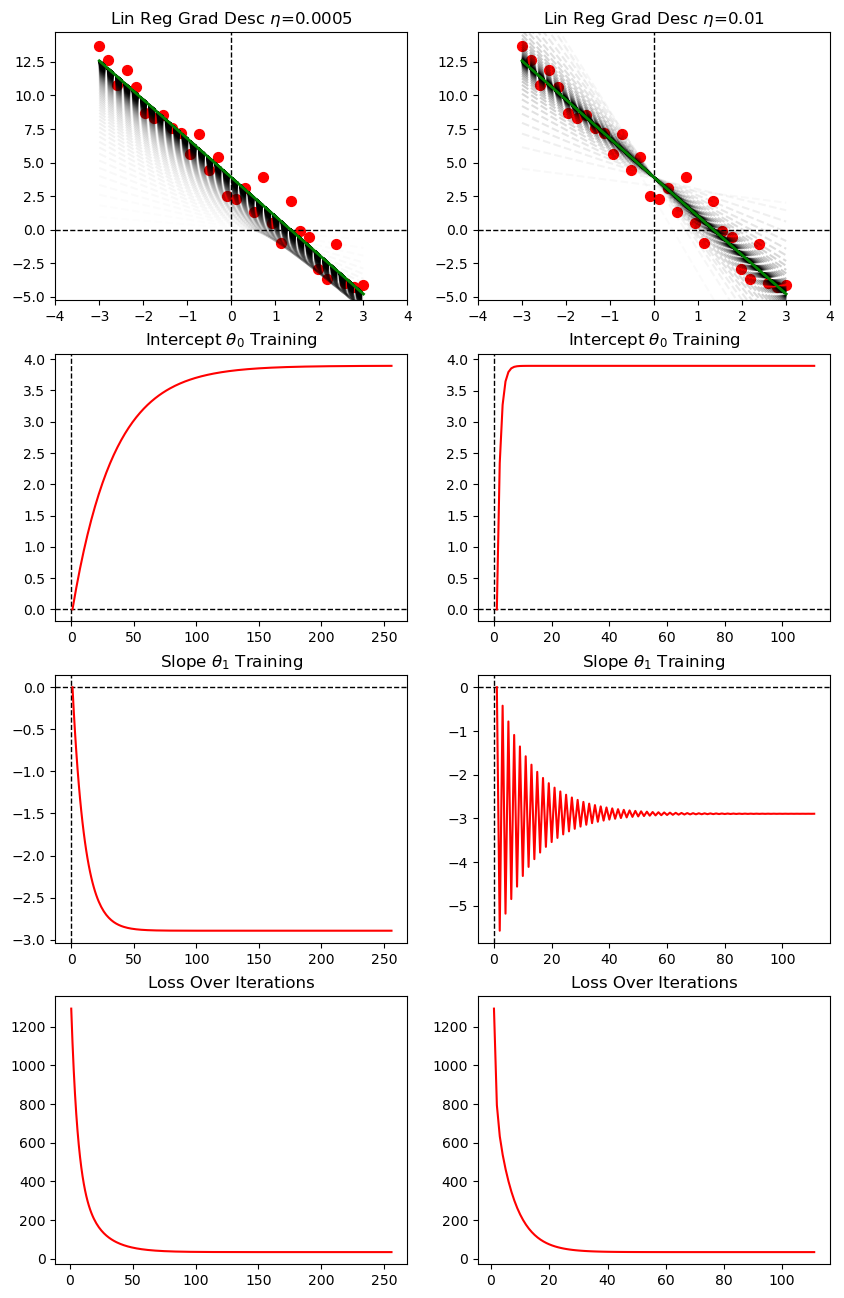

In [5]:
x = np.linspace(-3,3,30)
noise = np.random.normal(0, 1.5, size=len(x))
y = -3 * x + 4 + noise
ypred_list = []

etascale = [0.0005, 0.01]
epsilon = [0.1, 0.1]

# theta = np.array([])

num_iters = [0, 0]

gradJ = np.array([])

# Function to compute the gradient
def find_gradJ(x, y, theta):
    j0 = 0.
    j1 = 0.
    
    for i in range(len(x)):
        j0 += y[i] - (theta[0] + theta[1] * x[i])
        j1 += x[i] * (y[i] - (theta[0] + theta[1] * x[i]))

    j0 *= -2
    j1 *= -2

    return np.array([j0, j1])



for k in range(len(etascale)):

    # Initializing gradient and parameters
    
    if k == 0:
        theta = [[np.array([0,0])]]
        
        gradJ = [[find_gradJ(x, y, theta[k][-1])]]
        
    else:
        theta.append([np.array([0,0])])
        gradJ.append([find_gradJ(x, y, theta[k][-1])])
    
    ypred_list.append([])
    ypred_list[k].append(theta[k][-1][0] + x * theta[k][-1][1])
    num_iters[k] += 1
    
    # t = 0
    while abs(gradJ[k][-1][0]) > epsilon[0] or abs(gradJ[k][-1][1]) > epsilon[1]:
        
        theta[k].append(theta[k][-1] - etascale[k] * gradJ[k][-1])
        
        gradJ[k].append(find_gradJ(x, y, theta[k][-1]))
        
        
        ypred_list[k].append(theta[k][-1][0] + x * theta[k][-1][1])
                        
        num_iters[k] += 1


fig, axes = plt.subplots(4, len(etascale), figsize=(10,16))


for j in range(len(etascale)):

    for k in range(3):
        axes[k, j].axhline(0, color='black', linestyle='--', linewidth=1)
        axes[k, j].axvline(0, color='black', linestyle='--', linewidth=1)

    # Plotting Points and Regression
    axes[0, j].scatter(x, y, color="red", s=50)
    for i in range(num_iters[j]-1):
        axes[0, j].plot(x, ypred_list[j][i], color='black', alpha=(i+1)/num_iters[j], linestyle="--")
    axes[0, j].plot(x, ypred_list[j][-1], color='green', linewidth=2)
    axes[0, j].set_title(f"Lin Reg Grad Desc $\\eta$={etascale[j]}")
    axes[0, j].set_xlim(min(x)-1, max(x)+1)
    axes[0, j].set_ylim(min(y)-1, max(y)+1)

    # Plotting theta[0] over iterations
    axes[1, j].plot(list(range(1, num_iters[j]+1)), [theta_vec[0] for theta_vec in theta[j]], color="red")#, s=50)
    axes[1, j].set_title(f"Intercept $\\theta_0$ Training")

    # Plotting theta[1] over iterations
    axes[2, j].plot(list(range(1, num_iters[j]+1)), [theta_vec[1] for theta_vec in theta[j]], color="red")#, s=50)
    axes[2, j].set_title(f"Slope $\\theta_1$ Training")

    # Plotting loss over time
    J = []
   
    for i in range(num_iters[j]):
        
        Jval = np.sum((y - ypred_list[j][i]) ** 2)

        J.append(Jval)
    
    axes[3, j].set_title(f"Loss Over Iterations")
    axes[3, j].plot(list(range(1, num_iters[j]+1)), J, color="red")#, s=50)
    

The above examples show what is refered to as "Batch" or "Vanilla" Gradient Descent, where each iteration uses the entire dataset. This, however, can become computationally expensive. So now, we'll take a look at some other variations of the Gradient Descent algorithm. First, we'll introduce "Stochastic" Gradient Descent (or SGD), where each iteration trains only on one point. So for linear regression, instead of using

$$
\nabla_{\Theta} J(\Theta) = \nabla_{\Theta}[\sum_{i=1}^n(y_i-\hat{y}_i)^2]=\nabla_{\Theta}[\sum_{i=1}^n(y_i-(\theta_0 + \theta_1x_i))^2]
$$

at each iteration, we will estimate $\nabla_{\Theta} J(\Theta)$ as

$$
\nabla_{\Theta} J(\Theta) \approx \nabla_{\Theta}((y_i-\hat{y}_i)^2)
$$

where $y_i$ is a randomly selected point (**clarify random) and $\hat{y}_i$ is the corresponding predicted value given the current parameters.

131


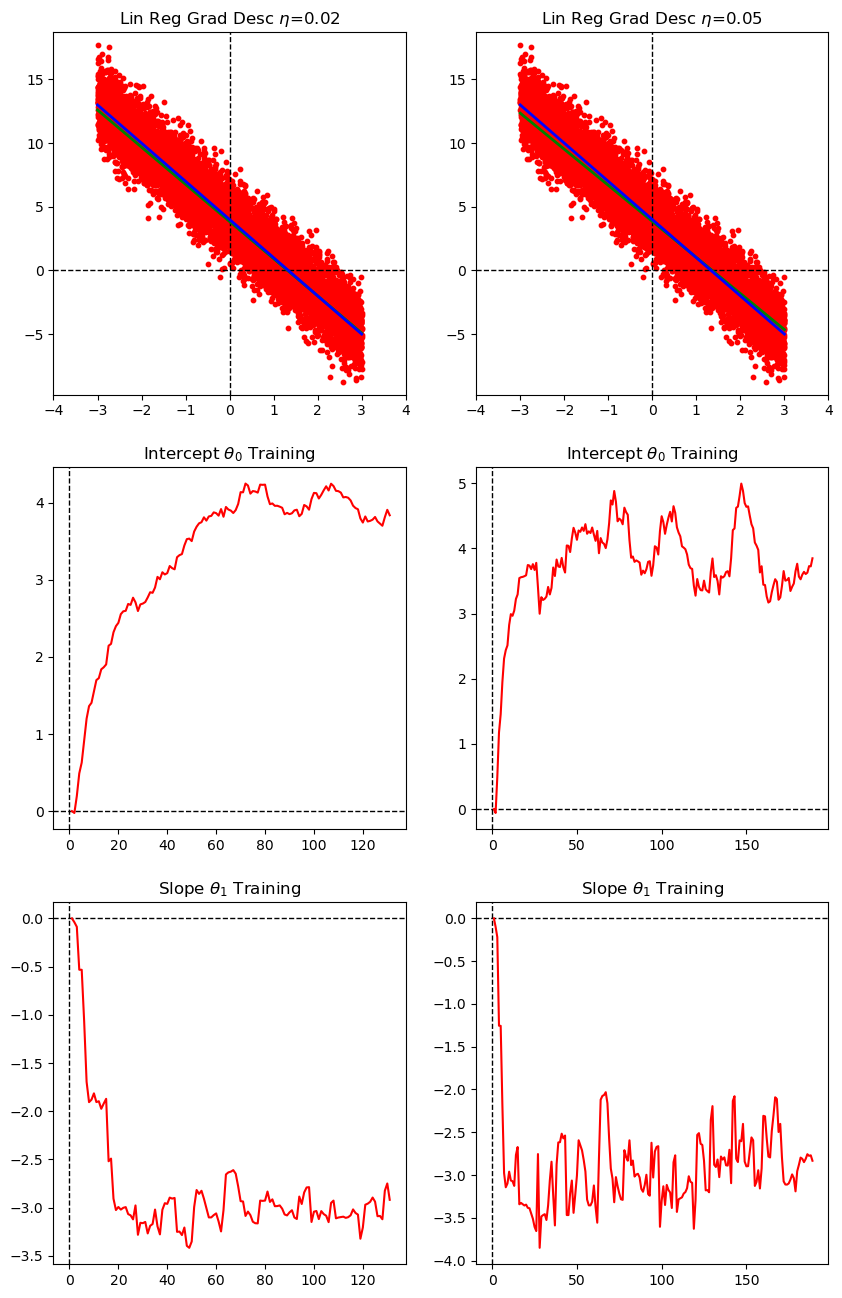

In [ ]:
x = np.linspace(-3,3,9000)
noise = np.random.normal(0, 1.5, size=len(x))
y = -3 * x + 4 + noise

# Shuffling our x and y values for training
shuffle_points = list(zip(x,y))
np.random.shuffle(shuffle_points)
xshuffle, yshuffle = zip(*shuffle_points)

ypred_list = []

etascale = [0.02, 0.05]
epsilon = [0.05, 0.05]

num_iters = [0, 0]

gradJ = np.array([])

# Function to compute the gradient
def find_gradJ_sp(x, y, theta):
    
    j0 = -2 * (y - (theta[0] + theta[1] * x))
    j1 = -2 * (x * (y - (theta[0] + theta[1] * x)))
    
    return np.array([j0, j1])



for k in range(len(etascale)):

    # Initializing gradient and parameters
    
    if k == 0:
        theta = [[np.array([0,0])]]
        # print(theta.shape)
        gradJ = [[find_gradJ_sp(xshuffle[0], yshuffle[0], theta[k][-1])]]
        #print(theta[k])
    else:
        theta.append([np.array([0,0])])
        gradJ.append([find_gradJ_sp(xshuffle[0], yshuffle[0], theta[k][-1])])
    
    ypred_list.append([])
    ypred_list[k].append(theta[k][-1][0] + x * theta[k][-1][1])
    num_iters[k] += 1
    point_index = 1
    # t = 0
  
    
    while abs(gradJ[k][-1][0]) > epsilon[0] or abs(gradJ[k][-1][1]) > epsilon[1]:
        #print(abs(gradJ[k][-1][0]) > epsilon[0])
        #print(abs(gradJ[k][-1][1]) > epsilon[1])
        # print((theta[k][-1] - etascale[k] * gradJ[k][-1]).shape)
        #theta[k].append(theta[k][-1] - etascale[k] * gradJ[k][-1])
        theta[k].append(theta[k][-1] - (etascale[k] / (1 + 0.0005 * num_iters[-1])) * gradJ[k][-1])
        
        gradJ[k].append(find_gradJ_sp(xshuffle[point_index], yshuffle[point_index], theta[k][-1]))
        
        #ypred = theta[k][-1][0] + x * theta[k][-1][1]
        #ypred_list[k].append(ypred)
        ypred_list[k].append(theta[k][-1][0] + x * theta[k][-1][1])
                        
        num_iters[k] += 1

        if point_index < len(x)-1:
            point_index += 1
        else:
            point_index = 0
            print("bop")
            # Shuffling our x and y values for training
            shuffle_points = list(zip(x,y))
            np.random.shuffle(shuffle_points)
            xshuffle, yshuffle = zip(*shuffle_points)

    #print(abs(gradJ[k][-1][0]))
    #print(abs(gradJ[k][-1][1]))
    #print(theta[k][-1][0])
    #print(theta[k][-1][1])

fig, axes = plt.subplots(3, len(etascale), figsize=(10,16))
#fig2, axes2 = plt.subplots(1, 2, subplot_kw={'projection':'3d'}, figsize=(10,6))

for j in range(len(etascale)):

    for k in range(3):
        axes[k, j].axhline(0, color='black', linestyle='--', linewidth=1)
        axes[k, j].axvline(0, color='black', linestyle='--', linewidth=1)

    # Plotting Points and Regression
    axes[0, j].scatter(x, y, color="red", s=10)
    #for i in range(num_iters[j]-1):
        #axes[0, j].plot(x, ypred_list[j][i], color='black', alpha=0.5 * (i+1)/num_iters[j], linestyle="--")
    axes[0, j].plot(x, ypred_list[j][-1], color='green', linewidth=2)
    axes[0, j].set_title(f"Lin Reg Grad Desc $\\eta$={etascale[j]}")
    axes[0, j].set_xlim(min(x)-1, max(x)+1)
    axes[0, j].set_ylim(min(y)-1, max(y)+1)

    # Plotting theta[0] over iterations
    axes[1, j].plot(list(range(1, num_iters[j]+1)), [theta_vec[0] for theta_vec in theta[j]], color="red")#, s=50)
    axes[1, j].set_title(f"Intercept $\\theta_0$ Training")

    # Plotting theta[1] over iterations
    axes[2, j].plot(list(range(1, num_iters[j]+1)), [theta_vec[1] for theta_vec in theta[j]], color="red")#, s=50)
    axes[2, j].set_title(f"Slope $\\theta_1$ Training")


    # Checking against other lin reg algo
    params = np.polyfit(x,y,1)
    axes[0, j].plot(x, params[0] * x + params[1], color='blue', linewidth=2)

    # Plotting loss over time
    #J = []
    #print(len(ypred_list[0]))
    #print(num_iters[0])
    #print(len([theta_vec[0] for theta_vec in theta[j]]))
    #for i in range(num_iters[j]):
        #Jval = 0.
        
        #np.sum((y - ypred_list[j][i]) ** 2)

        #J.append(Jval)
    
    #axes2[j].plot([theta_vec[0] for theta_vec in theta[j]], [theta_vec[1] for theta_vec in theta[j]], J)

print(num_iters[0])